In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore, laplace, norm, kurtosis
from scipy.special import boxcox1p, inv_boxcox1p
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

## SKEWNESS

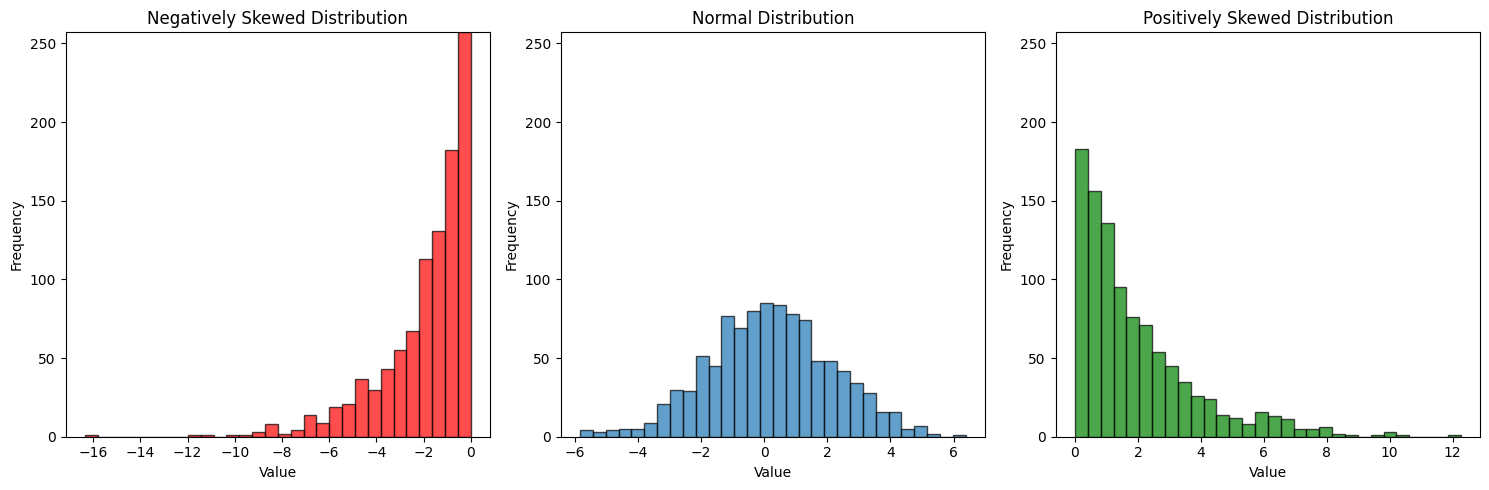

In [7]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate data for negatively skewed distribution
data_neg_skewed = -np.random.exponential(scale=2, size=1000)

# Generate data for normal distribution
data_normal = np.random.normal(loc=0, scale=2, size=1000)

# Generate data for positively skewed distribution
data_pos_skewed = np.random.exponential(scale=2, size=1000)

# Create subplots with three histograms aligned horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot negatively skewed distribution
axes[0].hist(data_neg_skewed, bins=30, edgecolor='k', alpha=0.7, color='red')
axes[0].set_title("Negatively Skewed Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Plot normal distribution
axes[1].hist(data_normal, bins=30, edgecolor='k', alpha=0.7)
axes[1].set_title("Normal Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Plot positively skewed distribution
axes[2].hist(data_pos_skewed, bins=30, edgecolor='k', alpha=0.7, color='green')
axes[2].set_title("Positively Skewed Distribution")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

# Align the y-axes of all subplots for better comparison
max_frequency = max(
    max(np.histogram(data_neg_skewed, bins=30)[0]),
    max(np.histogram(data_normal, bins=30)[0]),
    max(np.histogram(data_pos_skewed, bins=30)[0])
)
axes[0].set_ylim(0, max_frequency)
axes[1].set_ylim(0, max_frequency)
axes[2].set_ylim(0, max_frequency)

plt.tight_layout()
plt.show()

---

## KURTOSIS/HETEROSCEDASTICITY

In [8]:
# Generate random data from Laplace distribution and normal distribution
np.random.seed(42)
sample_size = 1000
laplace_data = laplace.rvs(loc=0, scale=1, size=sample_size)
normal_data = norm.rvs(loc=0, scale=1, size=sample_size)

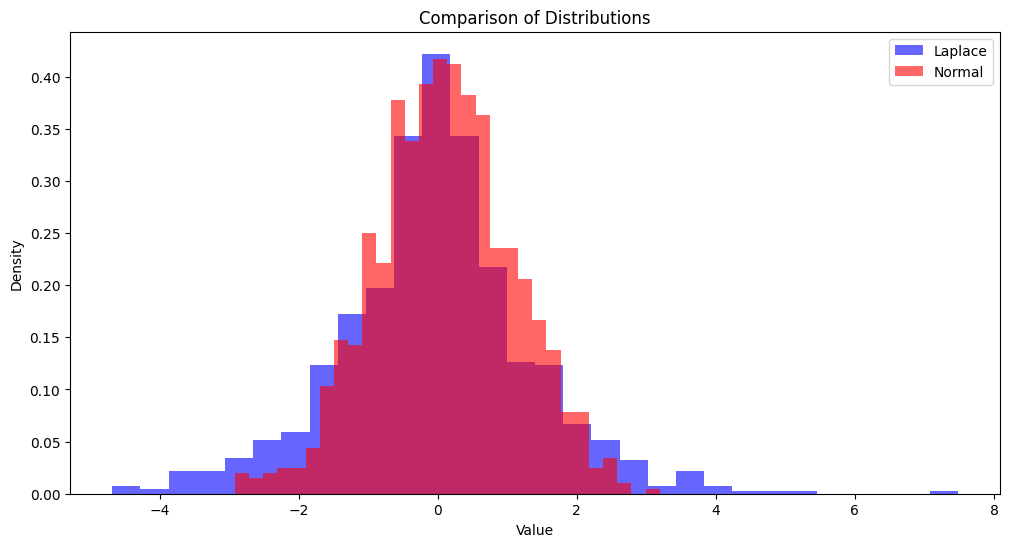

In [27]:
# Plot the distributions together
plt.figure(figsize=(12, 6))

plt.hist(laplace_data, bins=30, density=True, alpha=0.6, color='b', label='Laplace')
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='r', label='Normal')
plt.title('Comparison of Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

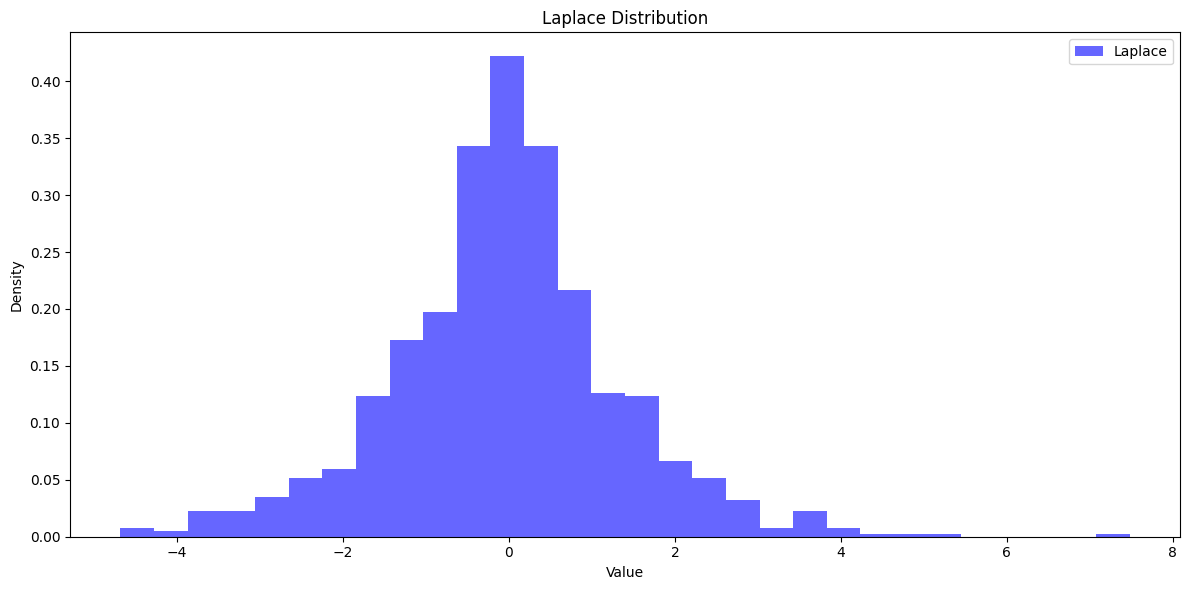

In [29]:
# Plot the distributions separately
plt.figure(figsize=(12, 6))

plt.hist(laplace_data, bins=30, density=True, alpha=0.6, color='b', label='Laplace')
plt.title('Laplace Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Calculate kurtosis
laplace_kurt = kurtosis(laplace_data)
normal_kurt = kurtosis(normal_data)

print("Kurtosis of Laplace distribution:", laplace_kurt)
print("Kurtosis of Normal distribution:", normal_kurt)

Kurtosis of Laplace distribution: 1.7407265538715295
Kurtosis of Normal distribution: -0.02712404243324462


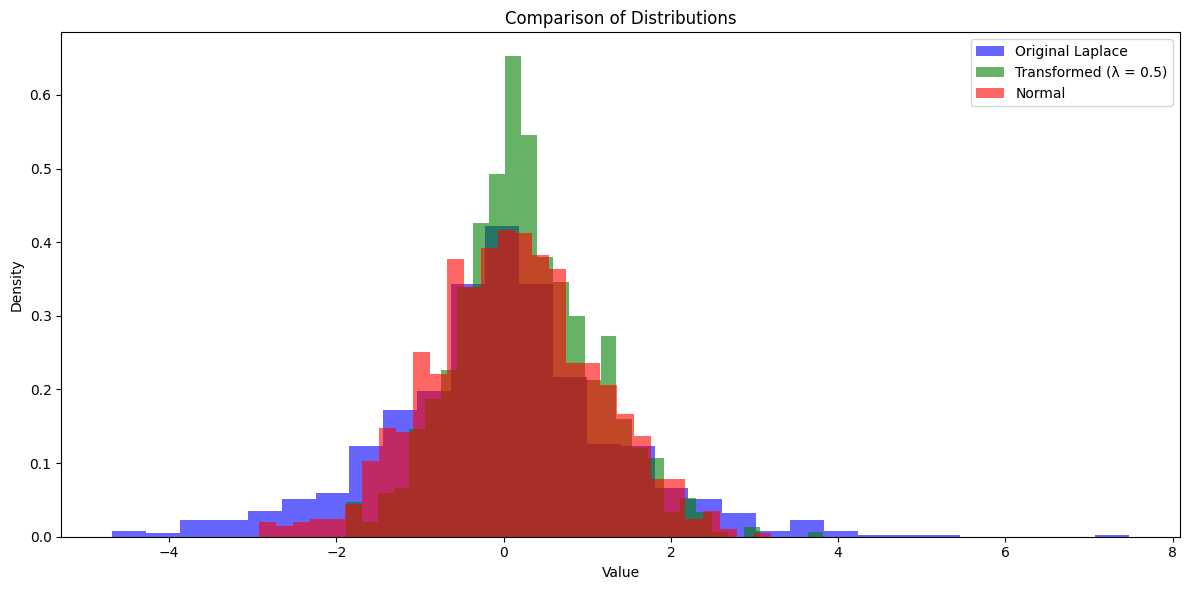

In [30]:
lam = 0.5
transformed_data = boxcox1p(laplace_data, lam)
inverse_transformed_data = inv_boxcox1p(transformed_data, lam)

# Plot the distributions together (original Laplace, transformed Laplace, normal)
plt.figure(figsize=(12, 6))
plt.hist(laplace_data, bins=30, density=True, alpha=0.6, color='b', label='Original Laplace')
plt.hist(transformed_data, bins=30, density=True, alpha=0.6, color='g', label=f'Transformed (λ = {lam})')
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='r', label='Normal')
plt.title('Comparison of Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

---

## SENSITIVITY TO OUTLIERS

In [13]:
df = pd.read_csv('placement/Placement_data_full_class.csv')
df = df.dropna()

In [14]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [15]:
numeric_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Calculate Z-Scores for numeric columns
z_scores = df[numeric_columns].apply(zscore)

# Define a threshold for Z-Score 
z_score_threshold = 3

# Find the indices of rows with outliers
outliers = (z_scores.abs() > z_score_threshold).any(axis=1)

# Print the indices of the rows containing outliers
df[outliers]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.00,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
197,198,F,83.96,Others,53.00,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


In [16]:
salary_column = 'salary'
initial_std = df[salary_column].std()
# Calculate Z-scores
df['zscore'] = zscore(df[salary_column])

# Threshold for outlier detection (e.g., 2 standard deviations)
outlier_threshold = 3

z_threshold = 3

z_scores = (df['salary'] - df['salary'].mean()) / initial_std
no_outliers = df[~(z_scores.abs() > z_threshold)]
updated_std = no_outliers['salary'].std()

sensitivity_std = abs((updated_std - initial_std) / initial_std)
print(f"Sensitivity to Outliers in Standatd Deviation: {sensitivity_std}")

Sensitivity to Outliers in Standatd Deviation: 0.3361660068991622


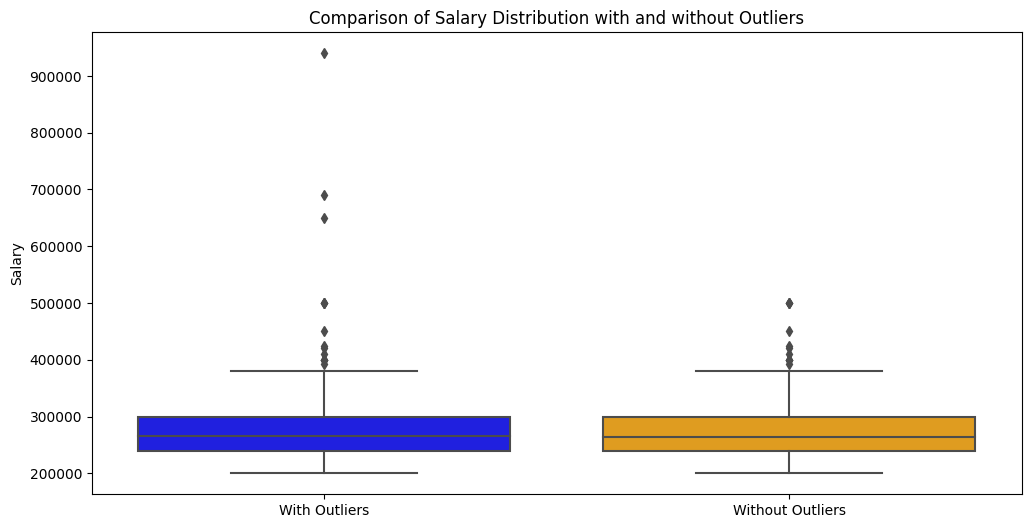

In [31]:
# Boxplot with and without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['salary'], no_outliers['salary']], palette=['blue', 'orange'])
plt.xticks([0, 1], ['With Outliers', 'Without Outliers'])
plt.ylabel('Salary')
plt.title('Comparison of Salary Distribution with and without Outliers')
plt.show()

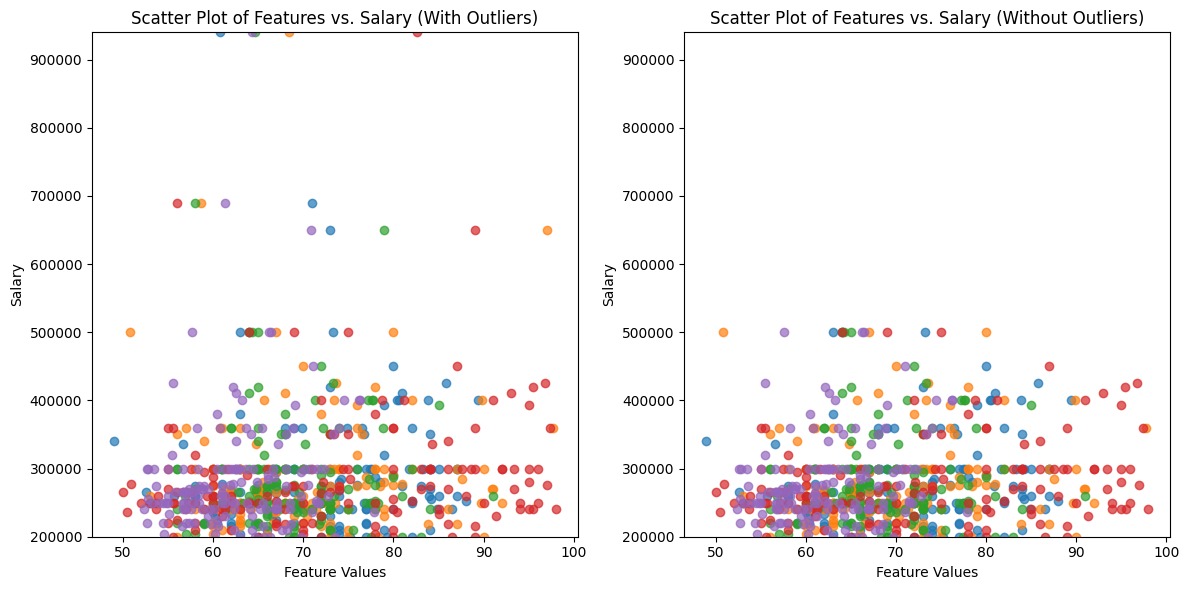

In [32]:
feature_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
target_column = 'salary'

y_min = df[target_column].min()
y_max = df[target_column].max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with outliers
for feature in feature_columns:
    axes[0].scatter(df[feature], df[target_column], label=feature, alpha=0.7)

axes[0].set_xlabel('Feature Values')
axes[0].set_ylabel('Salary')
axes[0].set_title('Scatter Plot of Features vs. Salary (With Outliers)')
axes[0].set_ylim(y_min, y_max)  # Set y-axis limits

# Scatter plot without outliers
for feature in feature_columns:
    axes[1].scatter(no_outliers[feature], no_outliers[target_column], label=feature, alpha=0.7)

axes[1].set_xlabel('Feature Values')
axes[1].set_ylabel('Salary')
axes[1].set_title('Scatter Plot of Features vs. Salary (Without Outliers)')
axes[1].set_ylim(y_min, y_max)  # Set y-axis limits

#plt.savefig('plot.png')

plt.tight_layout()
plt.show()

---

## NON-STATIONARITY

In [19]:
index_symbol = '^GSPC'  # S&P 500

index_data = yf.download(index_symbol, start="2020-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


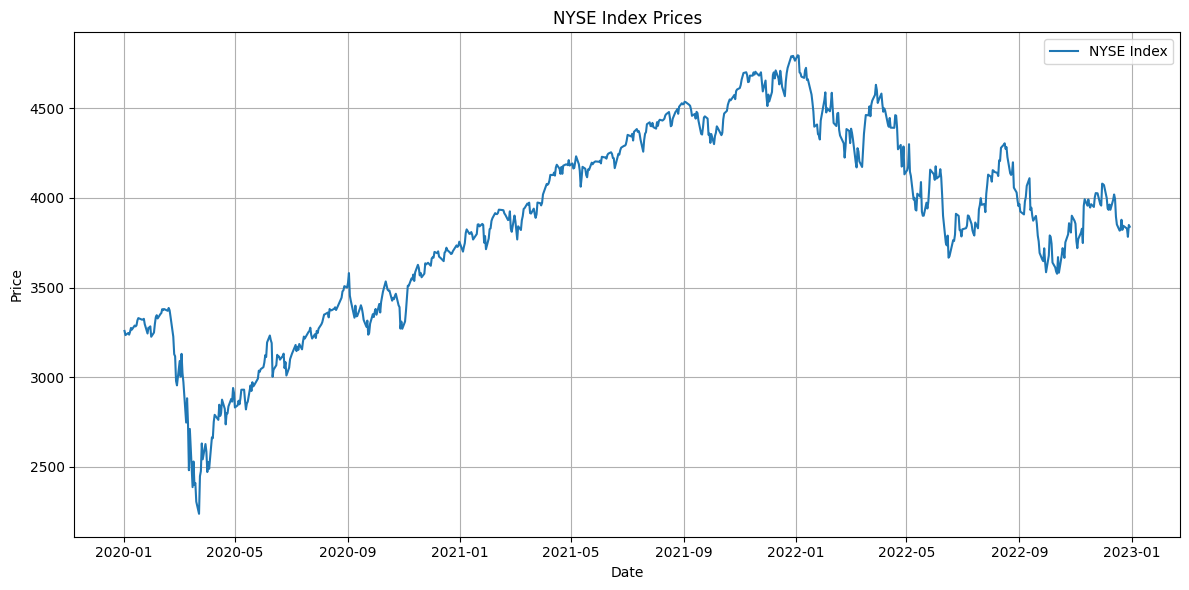

In [33]:
index_prices = index_data['Close']
plt.figure(figsize=(12, 6))
plt.plot(index_prices.index, index_prices, label='NYSE Index')
plt.title('NYSE Index Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Function to perform Augmented Dickey-Fuller test for stationarity
def test_stationarity(time_series):
    result = adfuller(time_series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", "Yes" if result[1] <= 0.05 else "No")

test_stationarity(index_prices)

ADF Statistic: -1.5202619422581274
p-value: 0.5234652993277291
Critical Values: {'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}
Is Stationary: No


In [24]:
#Convert to a stationary series
stationary_series = index_prices.diff().dropna()

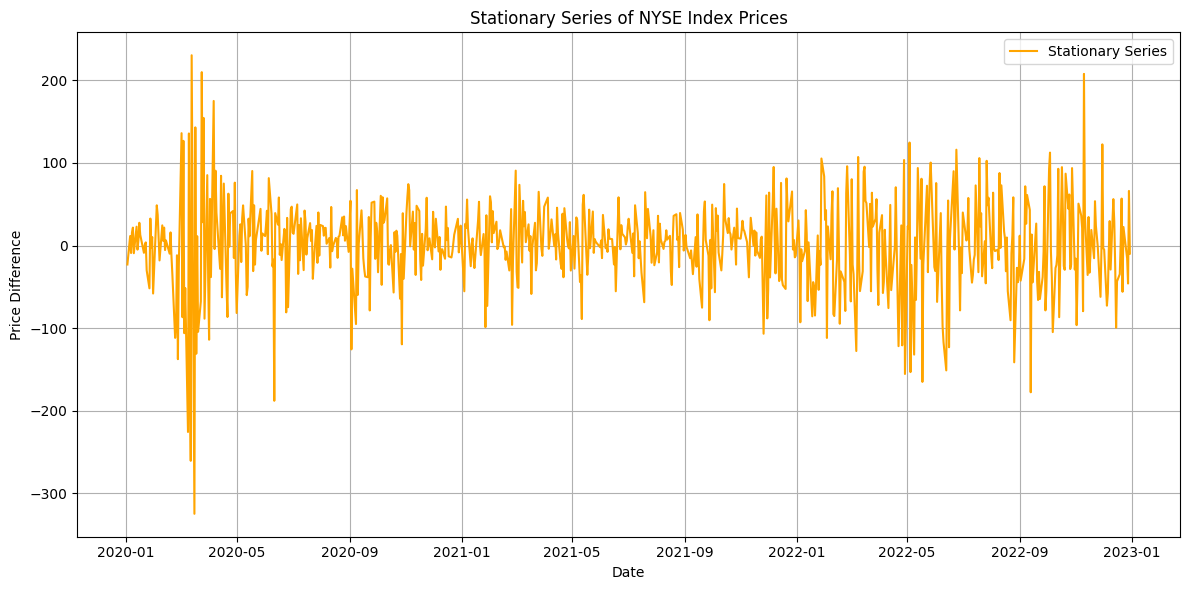

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(stationary_series.index, stationary_series, label='Stationary Series', color='orange')
plt.title('Stationary Series of NYSE Index Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Test the stationarity of the stationary series
print("\nStationarity Test for Stationary Series:")
test_stationarity(stationary_series)


Stationarity Test for Stationary Series:
ADF Statistic: -8.414962495932999
p-value: 2.0555083539545107e-13
Critical Values: {'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}
Is Stationary: Yes


---

Shapiro-Wilk Test:
Test Statistic: 0.9985588192939758
P-value: 0.593471348285675


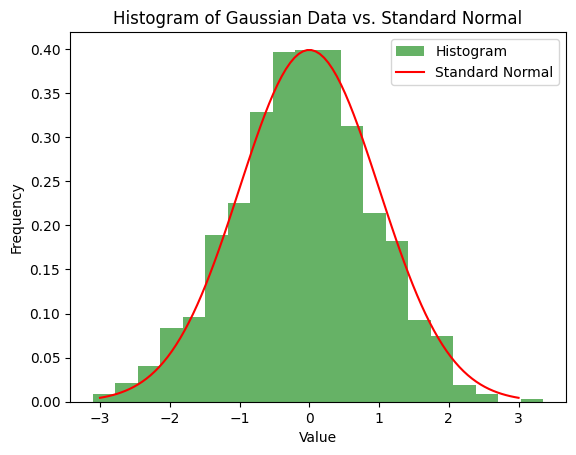

In [3]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

np.random.seed(1729)

# generate Gaussian data
data = np.random.normal(loc=0, scale=1, size=1000)

# perform Shapiro-Wilk test
statistic, p_value = shapiro(data)

print("Shapiro-Wilk Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the standard normal distribution for comparison
x = np.linspace(-3, 3, 100)
plt.plot(x, np.exp(-x**2/2) / np.sqrt(2*np.pi), 'r-', label='Standard Normal')

plt.legend()
plt.title('Histogram of Gaussian Data vs. Standard Normal')
#plt.savefig('plot.png')
plt.show()

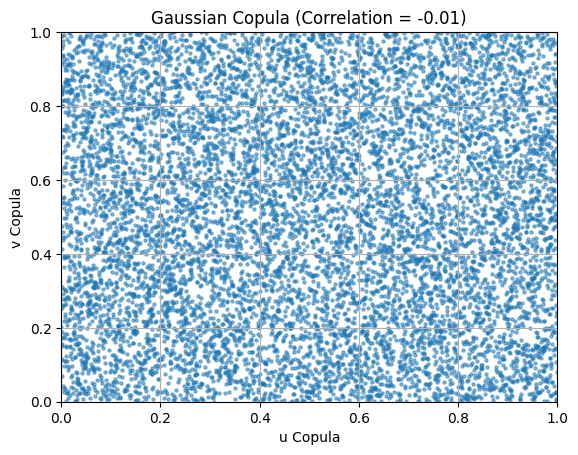

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import rankdata

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 10000

# Generate random samples from a standard normal distribution
u = np.random.normal(0, 1, n)
v = np.random.normal(0, 1, n)

# Calculate the correlation coefficient between u and v
corr_coefficient = np.corrcoef(u, v)[0, 1]

# Transform u and v to their empirical copula values
u_copula = rankdata(u) / (n + 1)
v_copula = rankdata(v) / (n + 1)

# Plot the scatter plot of the copula values
plt.scatter(u_copula, v_copula, s=5, alpha=0.5)
plt.title(f'Gaussian Copula (Correlation = {corr_coefficient:.2f})')
plt.xlabel('u Copula')
plt.ylabel('v Copula')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

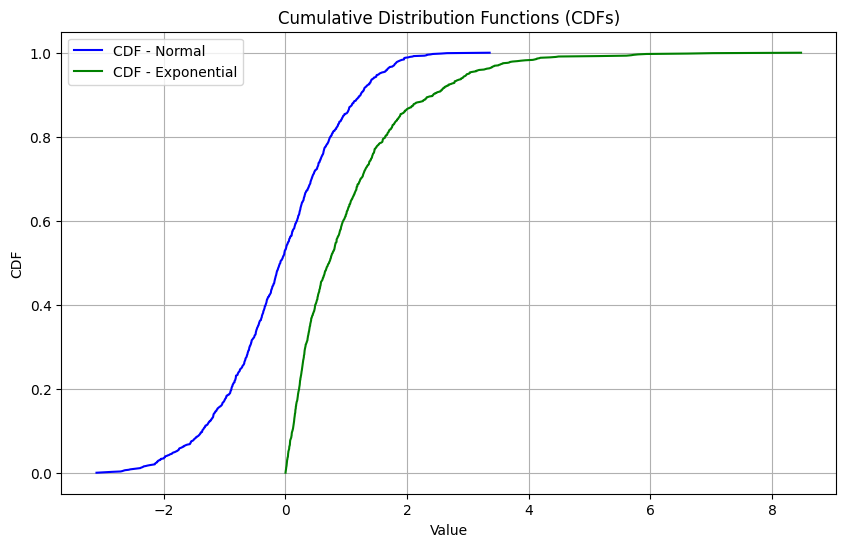

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

np.random.seed(1729)
data1 = norm.rvs(loc=0, scale=1, size=1000)  # Normal distribution
data2 = expon.rvs(scale=1, size=1000)        # Exponential distribution

# Calculate the CDF values for the data
x1 = np.sort(data1)
y1 = np.arange(1, len(x1) + 1) / len(x1)

x2 = np.sort(data2)
y2 = np.arange(1, len(x2) + 1) / len(x2)

# Create a plot for the CDFs
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='CDF - Normal', color='blue')
plt.plot(x2, y2, label='CDF - Exponential', color='green')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.grid(True)
plt.legend()
plt.show()

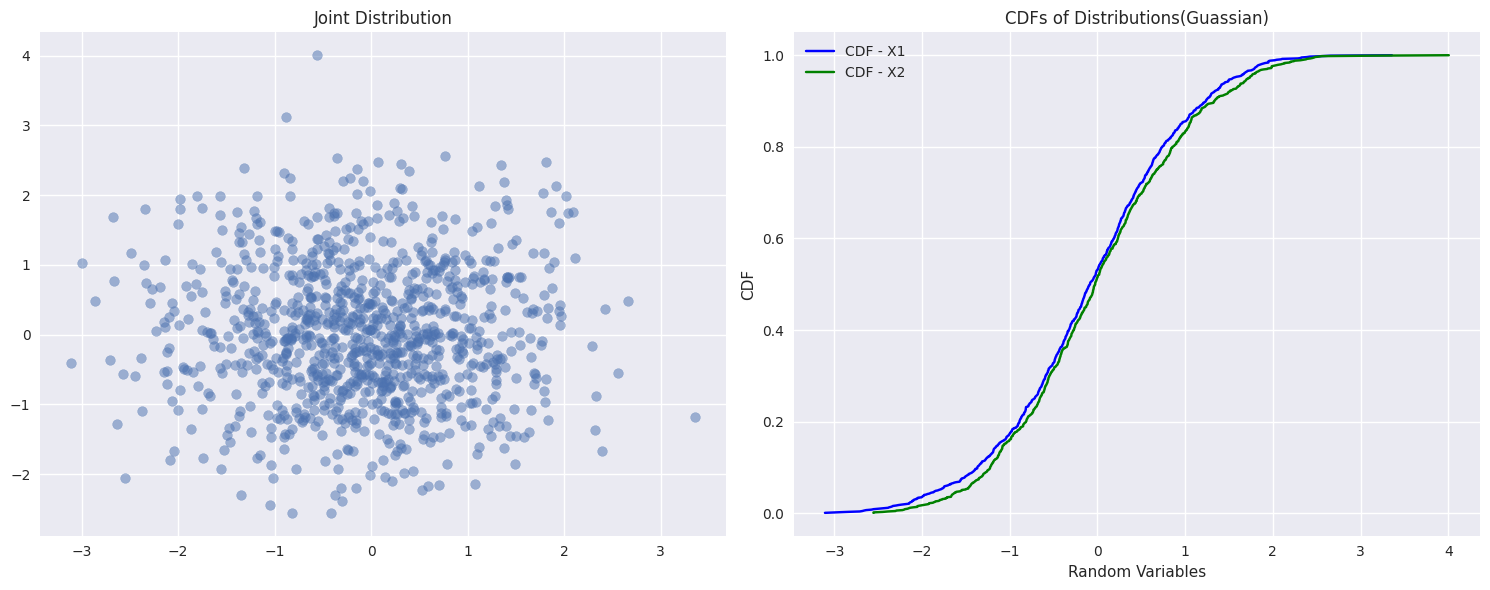

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set_style("darkgrid")

# no. of samples
n = 1000

X1 = norm.rvs(loc=0, scale=1, size=n, random_state=1729)  
X2 = norm.rvs(loc=0, scale=1, size=n, random_state=404)        

# Calculate the CDF values for the data
X1_cdf_x = np.sort(X1)
X2_cdf_x = np.sort(X2)
cdf_y = np.arange(1, n + 1) / n

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# plot the copula 
axs[0].scatter(X1, X2, alpha=0.5)
axs[0].set_title('Joint Distribution')

# plot the CDFs
axs[1].plot(X1_cdf_x, cdf_y, label='CDF - X1', color='blue')
axs[1].plot(X2_cdf_x, cdf_y, label='CDF - X2', color='green')
axs[1].set_xlabel('Random Variables')
axs[1].set_ylabel('CDF')
axs[1].set_title('CDFs of Distributions(Guassian)')
axs[1].grid(True)
axs[1].legend()
plt.savefig('jointplot.png')
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
from scipy.stats import shapiro
data = np.random.normal(0, 1, 100)
shapiro_test_stat, shapiro_p_value = shapiro(data)
print(shapiro_p_value)

0.1518665999174118
